<a href="https://colab.research.google.com/github/MunSu2001/File/blob/main/2026_02_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

sinmunsu_korea_food_path = kagglehub.dataset_download('sinmunsu/korea-food')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [ ]:
from torchvision.models import ResNet50_Weights
from torchvision import models, transforms, datasets

In [ ]:
#Model 구조 및 웨이트 값 적용
resnet = models.resnet50(weights=ResNet50_Weights.DEFAULT)

In [ ]:
from torchinfo import summary

In [ ]:
summary(resnet)

Layer (type:depth-idx)                   Param #
ResNet                                   --
├─Conv2d: 1-1                            9,408
├─BatchNorm2d: 1-2                       128
├─ReLU: 1-3                              --
├─MaxPool2d: 1-4                         --
├─Sequential: 1-5                        --
│    └─Bottleneck: 2-1                   --
│    │    └─Conv2d: 3-1                  4,096
│    │    └─BatchNorm2d: 3-2             128
│    │    └─Conv2d: 3-3                  36,864
│    │    └─BatchNorm2d: 3-4             128
│    │    └─Conv2d: 3-5                  16,384
│    │    └─BatchNorm2d: 3-6             512
│    │    └─ReLU: 3-7                    --
│    │    └─Sequential: 3-8              16,896
│    └─Bottleneck: 2-2                   --
│    │    └─Conv2d: 3-9                  16,384
│    │    └─BatchNorm2d: 3-10            128
│    │    └─Conv2d: 3-11                 36,864
│    │    └─BatchNorm2d: 3-12            128
│    │    └─Conv2d: 3-13               

In [ ]:
for name, param in resnet.named_parameters():
    print(name)

conv1.weight
bn1.weight
bn1.bias
layer1.0.conv1.weight
layer1.0.bn1.weight
layer1.0.bn1.bias
layer1.0.conv2.weight
layer1.0.bn2.weight
layer1.0.bn2.bias
layer1.0.conv3.weight
layer1.0.bn3.weight
layer1.0.bn3.bias
layer1.0.downsample.0.weight
layer1.0.downsample.1.weight
layer1.0.downsample.1.bias
layer1.1.conv1.weight
layer1.1.bn1.weight
layer1.1.bn1.bias
layer1.1.conv2.weight
layer1.1.bn2.weight
layer1.1.bn2.bias
layer1.1.conv3.weight
layer1.1.bn3.weight
layer1.1.bn3.bias
layer1.2.conv1.weight
layer1.2.bn1.weight
layer1.2.bn1.bias
layer1.2.conv2.weight
layer1.2.bn2.weight
layer1.2.bn2.bias
layer1.2.conv3.weight
layer1.2.bn3.weight
layer1.2.bn3.bias
layer2.0.conv1.weight
layer2.0.bn1.weight
layer2.0.bn1.bias
layer2.0.conv2.weight
layer2.0.bn2.weight
layer2.0.bn2.bias
layer2.0.conv3.weight
layer2.0.bn3.weight
layer2.0.bn3.bias
layer2.0.downsample.0.weight
layer2.0.downsample.1.weight
layer2.0.downsample.1.bias
layer2.1.conv1.weight
layer2.1.bn1.weight
layer2.1.bn1.bias
layer2.1.conv2.we

In [ ]:
for name, param in resnet.named_parameters():
    print(f"{name} --> {param.requires_grad}")

conv1.weight --> True
bn1.weight --> True
bn1.bias --> True
layer1.0.conv1.weight --> True
layer1.0.bn1.weight --> True
layer1.0.bn1.bias --> True
layer1.0.conv2.weight --> True
layer1.0.bn2.weight --> True
layer1.0.bn2.bias --> True
layer1.0.conv3.weight --> True
layer1.0.bn3.weight --> True
layer1.0.bn3.bias --> True
layer1.0.downsample.0.weight --> True
layer1.0.downsample.1.weight --> True
layer1.0.downsample.1.bias --> True
layer1.1.conv1.weight --> True
layer1.1.bn1.weight --> True
layer1.1.bn1.bias --> True
layer1.1.conv2.weight --> True
layer1.1.bn2.weight --> True
layer1.1.bn2.bias --> True
layer1.1.conv3.weight --> True
layer1.1.bn3.weight --> True
layer1.1.bn3.bias --> True
layer1.2.conv1.weight --> True
layer1.2.bn1.weight --> True
layer1.2.bn1.bias --> True
layer1.2.conv2.weight --> True
layer1.2.bn2.weight --> True
layer1.2.bn2.bias --> True
layer1.2.conv3.weight --> True
layer1.2.bn3.weight --> True
layer1.2.bn3.bias --> True
layer2.0.conv1.weight --> True
layer2.0.bn1.w

In [ ]:
import torch.nn as nn
class ResNet50TransferLearning(nn.Module):
    def __init__(self, num_classes: int, mode: str = 'feature_extraction'):
        # 부모 초기화 함수 호출
        super(ResNet50TransferLearning, self).__init__()
        self.backbone = models.resnet50(weights=ResNet50_Weights.DEFAULT)

        # 조건에 따라 전이학습과 파인튜닝 선택
        if mode == 'feature_extraction':
            for param in self.backbone.parameters():
                param.requires_grad = False
        # find tuning시 layer4만 파라미터 업데이트
        elif mode == 'fine_tuning':
            for name, param in self.backbone.named_parameters():
                if "layer4" in name:
                    param.requires_grad = True
                else:
                    param.requires_grad = False

        in_features = self.backbone.fc.in_features
        # 우리가 분류할려고 하는 클래스로 출력 변경
        # 512 node의 layer 추가
        self.backbone.fc = nn.Sequential(
            nn.Linear(in_features, 512),
            nn.ReLU(True),
            nn.Dropout(p=0.4),
            nn.Linear(512, num_classes)
        )

        self._initialize_weights()

    def _initialize_weights(self):
        for m in self.backbone.fc.modules():
            if isinstance(m, nn.Linear):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)


    def forward(self, x):
        return self.backbone(x)


In [ ]:
import pandas as pd
import os

In [ ]:
# 002 -> 고등어
# 131 -> 족발
# 135 -> 감자탕
# 098 -> 계란말이
# 069 -> 김밥
# 023 -> 양념치킨

In [ ]:
target = "/kaggle/input/datasets/sinmunsu/korea-food"
file_list = []
for roots, dirs, files in os.walk(target):
    for file in files:
        #print(f"{roots}/{file}")
        file_list.append(file)
df = pd.DataFrame( {'img_src' : file_list})


In [ ]:
df

,img_src
0,Img_002_0219.jpg
1,Img_002_0502.jpg
2,Img_002_0748.jpg
3,Img_002_0949.jpg
4,Img_002_0156.jpg
...,...
4436,Img_069_0019.jpg
4437,Img_069_0653.jpg
4438,Img_069_0577.jpg
4439,Img_069_0709.jpg


In [ ]:
df.loc[:,'label'] = df.img_src.apply(lambda x : x.split("_")[1])


In [ ]:
df = df[~((df.label == "url.csv") | (df.label == "area.properties"))].copy()


In [ ]:
df.label.unique()


array(['002', '131', '098', '023', '135', '069'], dtype=object)

In [ ]:
master = { '002' : 0 ,
  '131' : 1,
  '135' : 2,
  '098' : 3,
  '069' : 4,
  '023' : 5}


In [ ]:
df.loc[:, 'y'] = df.label.apply(lambda x : master[x])


In [ ]:
df.y.value_counts()

y
0    1000
4    1000
5     928
2     746
1     557
3     203
Name: count, dtype: int64

In [ ]:
os.mkdir("./data")

In [ ]:
import shutil
for roots, dirs, files in os.walk(target):
    for file in files:
        # print(f"{roots}/{file}")
        shutil.copy(f"{roots}/{file}", f'/kaggle/working/data/{file}')


In [ ]:
import subprocess
result = subprocess.run(['ls', '-al'], capture_output=True, text=True)


In [ ]:
print(result.stdout)

total 164
drwxr-xr-x 4 root root   4096 Feb 12 01:41 .
drwxr-xr-x 5 root root   4096 Feb 12 00:07 ..
drwxr-xr-x 2 root root 155648 Feb 12 01:42 data
drwxr-xr-x 2 root root   4096 Feb 12 00:07 .virtual_documents



In [ ]:
data_dir = "/kaggle/working/data"
from sklearn.model_selection import train_test_split

In [ ]:
X_train , X_test, y_train, y_test  =train_test_split(df.drop('y', axis=1), df.y, random_state=42,
                stratify=df.y)

In [ ]:
y_train.value_counts(normalize=True)

y
4    0.225564
0    0.225564
5    0.209323
2    0.168120
1    0.125714
3    0.045714
Name: proportion, dtype: float64

In [ ]:
y_test.value_counts(normalize=True)

y
4    0.225428
0    0.225428
5    0.209197
2    0.168620
1    0.125338
3    0.045987
Name: proportion, dtype: float64

In [ ]:
from torch.utils.data import Dataset, DataLoader
from PIL import Image
class FoodDataset(Dataset):
    def __init__(self, X, y, target, transform=None):
        self.X = X
        self.y = y
        self.target = target
        self.transform = transform

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        file_name = self.X.iloc[idx, 0]
        img_path = os.path.join(self.target, file_name)

        image = Image.open(img_path).convert('RGB')

        if self.transform:
            image = self.transform(image)
        return image, self.y.iloc[idx]


In [ ]:
y_train

3113    2
4335    4
3102    2
2824    2
3525    4
       ..
1237    1
2739    2
2260    5
3422    2
843     0
Name: y, Length: 3325, dtype: int64

In [ ]:
os.path.join("/kaggle/working/data", X_train.iloc[0,0])

'/kaggle/working/data/Img_135_0977.jpg'

In [ ]:
tmp = FoodDataset(X_train, y_train, "/kaggle/working/data")

In [ ]:
a = iter(tmp)

In [ ]:
tmp_data = next(a)[0]

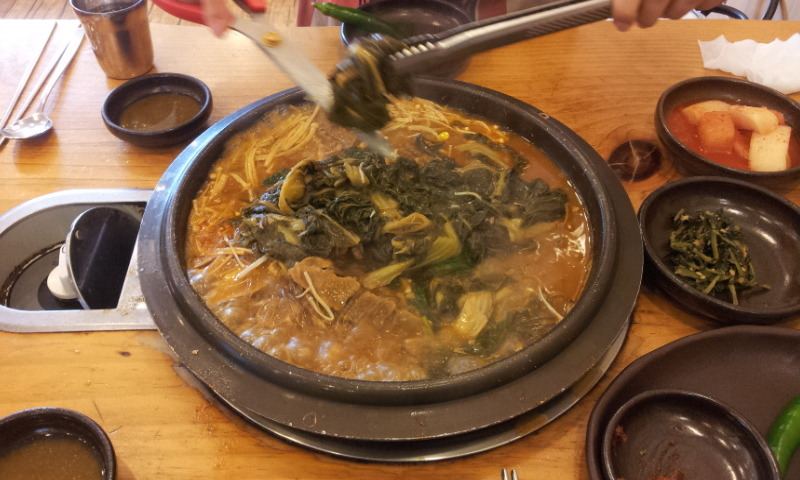

In [ ]:
tmp_data

In [ ]:
train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.1, contrast=0.1),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])


val_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [ ]:
train_dataset = FoodDataset(X_train, y_train, "/kaggle/working/data", transform=train_transforms)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataset = FoodDataset(X_test, y_test, "/kaggle/working/data", transform=val_transforms)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

In [ ]:
next(iter(train_loader))

[tensor([[[[-2.0837, -2.0837, -2.0837,  ..., -2.0837, -2.0837, -2.0837],
           [-2.0837, -2.0837, -2.0837,  ..., -2.0837, -2.0837, -2.0837],
           [-2.0837, -2.0837, -2.0837,  ..., -2.0837, -2.0837, -2.0837],
           ...,
           [-2.0837, -2.0837, -2.0837,  ..., -2.0837, -2.0837, -2.0837],
           [-2.0837, -2.0837, -2.0837,  ..., -2.0837, -2.0837, -2.0837],
           [-2.0837, -2.0837, -2.0837,  ..., -2.0837, -2.0837, -2.0837]],
 
          [[-2.0007, -2.0007, -2.0007,  ..., -2.0007, -2.0007, -2.0007],
           [-2.0007, -2.0007, -2.0007,  ..., -2.0007, -2.0007, -2.0007],
           [-2.0007, -2.0007, -2.0007,  ..., -2.0007, -2.0007, -2.0007],
           ...,
           [-2.0007, -2.0007, -2.0007,  ..., -2.0007, -2.0007, -2.0007],
           [-2.0007, -2.0007, -2.0007,  ..., -2.0007, -2.0007, -2.0007],
           [-2.0007, -2.0007, -2.0007,  ..., -2.0007, -2.0007, -2.0007]],
 
          [[-1.7696, -1.7696, -1.7696,  ..., -1.7696, -1.7696, -1.7696],
           [-

In [ ]:
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
def train_model(model, dataloaders, criterion, optimizer,
                num_epochs=25, device='cuda'):

    best_acc = 0.0
    history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}


    for epoch in range(num_epochs):
        print(f'\nEpoch {epoch+1}/{num_epochs}')
        print('-' * 60)


        # 각 epoch마다 train -> val phase 순환
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Dropout 활성화, BN 학습 모드
            else:
                model.eval()   # Dropout 비활성화, BN 추론 모드


            running_loss = 0.0
            running_corrects = 0


            # 진행률 표시
            pbar = tqdm(dataloaders[phase], desc=phase)


            for inputs, labels in pbar:
                inputs = inputs.to(device, non_blocking=True)
                labels = labels.to(device, non_blocking=True)


                # gradient 누적 초기화
                optimizer.zero_grad()


                # Forward pass
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)  # 예측 클래스
                    loss = criterion(outputs, labels)


                    # Backward + Optimize (train phase only)
                    if phase == 'train':
                        loss.backward()


                        # Gradient Clipping (VGG16은 깊어서 안정성을 위해 권장)
                        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)


                        optimizer.step()


                # 통계 계산
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)


                # tqdm 업데이트
                pbar.set_postfix({'loss': loss.item()})


            # Epoch 통계
            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            epoch_acc = running_corrects.double() / len(dataloaders[phase].dataset)


            history[f'{phase}_loss'].append(epoch_loss)
            history[f'{phase}_acc'].append(epoch_acc.item())


            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')


            # 최적 모델 저장 (validation 기준)
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = model.state_dict().copy()
                torch.save(best_model_wts, 'best_vgg16_transfer.pth')


        # 학습률 업데이트
        # if scheduler is not None:
        #     if isinstance(scheduler, optim.lr_scheduler.ReduceLROnPlateau):
        #         scheduler.step(epoch_loss)  # val loss 기준
        #     else:
        #         scheduler.step()


    print(f'\nBest val Acc: {best_acc:.4f}')
    model.load_state_dict(best_model_wts)
    return model, history


In [ ]:
model = ResNet50TransferLearning(6)
model = model.to(device)
criterion = nn.CrossEntropyLoss()
MODE = 'feature_extraction'
import torch.optim as optim
if MODE == 'feature_extraction':
    # FC layer만 학습하므로 일반적인 LR 사용 가능
    optimizer = optim.Adam(
        filter(lambda p: p.requires_grad, model.parameters()),
        lr=1e-4,
        weight_decay=1e-4  # L2 정규화 (과적합 방지)
    )
else:  # fine_tuning
    # 전체 네트워크 미세 조정 시 매우 작은 LR 필요
    # VGG16은 깊은 네트워크이므로 SGD + Momentum이 더 안정적
    optimizer = optim.SGD(
        filter(lambda p: p.requires_grad, model.parameters()),
        lr=1e-2,          # ImageNet 학습률의 1/10 이하
        momentum=0.9,     # 관성항으로 안정적 수렴
        weight_decay=5e-4)

In [ ]:
from tqdm import tqdm
NUM_EPOCHS = 30
dataloaders = {'train' : train_loader , 'val' : test_loader}
model, history = train_model(
        model, dataloaders, criterion, optimizer,
        num_epochs=NUM_EPOCHS, device=device
    )


Epoch 1/30
------------------------------------------------------------


train: 100%|██████████| 104/104 [00:32<00:00,  3.23it/s, loss=1.09]


train Loss: 1.4185 Acc: 0.5681


val: 100%|██████████| 35/35 [00:11<00:00,  2.94it/s, loss=0.985]


val Loss: 1.0024 Acc: 0.7791

Epoch 2/30
------------------------------------------------------------


train: 100%|██████████| 104/104 [00:32<00:00,  3.20it/s, loss=0.647]


train Loss: 0.8921 Acc: 0.7657


val: 100%|██████████| 35/35 [00:11<00:00,  2.96it/s, loss=0.72] 


val Loss: 0.6253 Acc: 0.8575

Epoch 3/30
------------------------------------------------------------


train: 100%|██████████| 104/104 [00:32<00:00,  3.22it/s, loss=0.486]


train Loss: 0.6507 Acc: 0.8162


val: 100%|██████████| 35/35 [00:11<00:00,  2.97it/s, loss=0.381]


val Loss: 0.4611 Acc: 0.8963

Epoch 4/30
------------------------------------------------------------


train: 100%|██████████| 104/104 [00:32<00:00,  3.22it/s, loss=0.618]


train Loss: 0.5343 Acc: 0.8496


val: 100%|██████████| 35/35 [00:11<00:00,  2.95it/s, loss=0.399]


val Loss: 0.3702 Acc: 0.8972

Epoch 5/30
------------------------------------------------------------


train: 100%|██████████| 104/104 [00:32<00:00,  3.22it/s, loss=0.542]


train Loss: 0.4845 Acc: 0.8562


val: 100%|██████████| 35/35 [00:11<00:00,  2.93it/s, loss=0.226]


val Loss: 0.3346 Acc: 0.9026

Epoch 6/30
------------------------------------------------------------


train: 100%|██████████| 104/104 [00:32<00:00,  3.22it/s, loss=0.409]


train Loss: 0.4474 Acc: 0.8644


val: 100%|██████████| 35/35 [00:11<00:00,  3.02it/s, loss=0.265]


val Loss: 0.2908 Acc: 0.9206

Epoch 7/30
------------------------------------------------------------


train: 100%|██████████| 104/104 [00:32<00:00,  3.24it/s, loss=0.467]


train Loss: 0.3818 Acc: 0.8821


val: 100%|██████████| 35/35 [00:11<00:00,  2.98it/s, loss=0.392]


val Loss: 0.2671 Acc: 0.9279

Epoch 8/30
------------------------------------------------------------


train: 100%|██████████| 104/104 [00:32<00:00,  3.21it/s, loss=0.629]


train Loss: 0.3625 Acc: 0.8854


val: 100%|██████████| 35/35 [00:11<00:00,  2.93it/s, loss=0.24] 


val Loss: 0.2471 Acc: 0.9279

Epoch 9/30
------------------------------------------------------------


train: 100%|██████████| 104/104 [00:32<00:00,  3.17it/s, loss=0.458]


train Loss: 0.3586 Acc: 0.8899


val: 100%|██████████| 35/35 [00:11<00:00,  2.93it/s, loss=0.298]


val Loss: 0.2473 Acc: 0.9306

Epoch 10/30
------------------------------------------------------------


train: 100%|██████████| 104/104 [00:33<00:00,  3.15it/s, loss=0.768]


train Loss: 0.3491 Acc: 0.8866


val: 100%|██████████| 35/35 [00:12<00:00,  2.90it/s, loss=0.566] 


val Loss: 0.2354 Acc: 0.9288

Epoch 11/30
------------------------------------------------------------


train: 100%|██████████| 104/104 [00:32<00:00,  3.20it/s, loss=0.165] 


train Loss: 0.3150 Acc: 0.9032


val: 100%|██████████| 35/35 [00:11<00:00,  2.93it/s, loss=0.135]


val Loss: 0.2131 Acc: 0.9369

Epoch 12/30
------------------------------------------------------------


train: 100%|██████████| 104/104 [00:32<00:00,  3.21it/s, loss=0.257]


train Loss: 0.3137 Acc: 0.8929


val: 100%|██████████| 35/35 [00:11<00:00,  2.92it/s, loss=0.221] 


val Loss: 0.2226 Acc: 0.9306

Epoch 13/30
------------------------------------------------------------


train: 100%|██████████| 104/104 [00:31<00:00,  3.30it/s, loss=0.311]


train Loss: 0.3094 Acc: 0.9017


val: 100%|██████████| 35/35 [00:11<00:00,  3.01it/s, loss=0.173]


val Loss: 0.2200 Acc: 0.9333

Epoch 14/30
------------------------------------------------------------


train: 100%|██████████| 104/104 [00:32<00:00,  3.23it/s, loss=0.365]


train Loss: 0.2959 Acc: 0.9041


val: 100%|██████████| 35/35 [00:11<00:00,  2.93it/s, loss=0.239] 


val Loss: 0.2013 Acc: 0.9378

Epoch 15/30
------------------------------------------------------------


train: 100%|██████████| 104/104 [00:32<00:00,  3.20it/s, loss=0.304]


train Loss: 0.2819 Acc: 0.9101


val: 100%|██████████| 35/35 [00:11<00:00,  2.94it/s, loss=0.0635]


val Loss: 0.2153 Acc: 0.9351

Epoch 16/30
------------------------------------------------------------


train: 100%|██████████| 104/104 [00:32<00:00,  3.19it/s, loss=0.329]


train Loss: 0.2789 Acc: 0.9110


val: 100%|██████████| 35/35 [00:11<00:00,  2.95it/s, loss=0.18]  


val Loss: 0.1926 Acc: 0.9387

Epoch 17/30
------------------------------------------------------------


train: 100%|██████████| 104/104 [00:32<00:00,  3.23it/s, loss=0.365]


train Loss: 0.2875 Acc: 0.9080


val: 100%|██████████| 35/35 [00:11<00:00,  3.00it/s, loss=0.188] 


val Loss: 0.1916 Acc: 0.9432

Epoch 18/30
------------------------------------------------------------


train: 100%|██████████| 104/104 [00:32<00:00,  3.22it/s, loss=0.363]


train Loss: 0.2675 Acc: 0.9149


val: 100%|██████████| 35/35 [00:11<00:00,  2.98it/s, loss=0.298] 


val Loss: 0.1808 Acc: 0.9504

Epoch 19/30
------------------------------------------------------------


train: 100%|██████████| 104/104 [00:32<00:00,  3.21it/s, loss=0.264]


train Loss: 0.2653 Acc: 0.9176


val: 100%|██████████| 35/35 [00:11<00:00,  2.94it/s, loss=0.102] 


val Loss: 0.1887 Acc: 0.9468

Epoch 20/30
------------------------------------------------------------


train: 100%|██████████| 104/104 [00:32<00:00,  3.20it/s, loss=0.218]


train Loss: 0.2608 Acc: 0.9098


val: 100%|██████████| 35/35 [00:11<00:00,  2.94it/s, loss=0.214] 


val Loss: 0.1947 Acc: 0.9414

Epoch 21/30
------------------------------------------------------------


train: 100%|██████████| 104/104 [00:32<00:00,  3.21it/s, loss=0.237]


train Loss: 0.2595 Acc: 0.9125


val: 100%|██████████| 35/35 [00:11<00:00,  2.92it/s, loss=0.222] 


val Loss: 0.1889 Acc: 0.9405

Epoch 22/30
------------------------------------------------------------


train: 100%|██████████| 104/104 [00:31<00:00,  3.27it/s, loss=0.159]


train Loss: 0.2415 Acc: 0.9242


val: 100%|██████████| 35/35 [00:11<00:00,  3.04it/s, loss=0.0466]


val Loss: 0.1765 Acc: 0.9468

Epoch 23/30
------------------------------------------------------------


train: 100%|██████████| 104/104 [00:32<00:00,  3.24it/s, loss=0.351] 


train Loss: 0.2538 Acc: 0.9167


val: 100%|██████████| 35/35 [00:11<00:00,  2.94it/s, loss=0.383] 


val Loss: 0.1762 Acc: 0.9450

Epoch 24/30
------------------------------------------------------------


train: 100%|██████████| 104/104 [00:32<00:00,  3.22it/s, loss=0.0806]


train Loss: 0.2441 Acc: 0.9176


val: 100%|██████████| 35/35 [00:11<00:00,  2.93it/s, loss=0.0759]


val Loss: 0.1724 Acc: 0.9423

Epoch 25/30
------------------------------------------------------------


train: 100%|██████████| 104/104 [00:32<00:00,  3.21it/s, loss=0.271] 


train Loss: 0.2240 Acc: 0.9263


val: 100%|██████████| 35/35 [00:11<00:00,  2.94it/s, loss=0.0679]


val Loss: 0.1728 Acc: 0.9477

Epoch 26/30
------------------------------------------------------------


train: 100%|██████████| 104/104 [00:32<00:00,  3.22it/s, loss=0.402]


train Loss: 0.2376 Acc: 0.9224


val: 100%|██████████| 35/35 [00:11<00:00,  2.94it/s, loss=0.119] 


val Loss: 0.1699 Acc: 0.9468

Epoch 27/30
------------------------------------------------------------


train: 100%|██████████| 104/104 [00:32<00:00,  3.20it/s, loss=0.145] 


train Loss: 0.2223 Acc: 0.9260


val: 100%|██████████| 35/35 [00:11<00:00,  2.98it/s, loss=0.102] 


val Loss: 0.1834 Acc: 0.9459

Epoch 28/30
------------------------------------------------------------


train: 100%|██████████| 104/104 [00:31<00:00,  3.31it/s, loss=0.314]


train Loss: 0.2233 Acc: 0.9305


val: 100%|██████████| 35/35 [00:11<00:00,  2.95it/s, loss=0.152] 


val Loss: 0.1713 Acc: 0.9459

Epoch 29/30
------------------------------------------------------------


train: 100%|██████████| 104/104 [00:32<00:00,  3.23it/s, loss=0.183] 


train Loss: 0.2347 Acc: 0.9194


val: 100%|██████████| 35/35 [00:11<00:00,  2.94it/s, loss=0.0645]


val Loss: 0.1700 Acc: 0.9459

Epoch 30/30
------------------------------------------------------------


train: 100%|██████████| 104/104 [00:32<00:00,  3.19it/s, loss=0.142]


train Loss: 0.2137 Acc: 0.9275


val: 100%|██████████| 35/35 [00:11<00:00,  2.95it/s, loss=0.128] 


val Loss: 0.1706 Acc: 0.9513

Best val Acc: 0.9513
